# Task 1.1:

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Task 1.2:

In [126]:
Data=pd.read_csv('DS2_C6_S5_Insurance_Data_Challenge.csv')
Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [94]:
Data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [95]:
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [96]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Task 1.3:

# Label Encoding

In [127]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
Data['sex']=lbl.fit_transform(Data['sex'])
Data['smoker']=lbl.fit_transform(Data['smoker'])
Data['region']=lbl.fit_transform(Data['region'])

In [89]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [18]:
Data.describe()

,age,sex,bmi,children,smoker,region,charges,Obesity
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.815396
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.388121
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,1.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [8]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Data Scaling

In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
SC=StandardScaler()
sc_data=SC.fit_transform(Data)
sc_data

array([[-1.43876426, -1.0105187 , -0.45332   , ...,  1.97058663,
         1.34390459,  0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.5074631 ,
         0.43849455, -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.5074631 ,
         0.43849455, -0.72867467],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.5074631 ,
         0.43849455, -0.96159623],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.5074631 ,
         1.34390459, -0.93036151],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.97058663,
        -0.46691549,  1.31105347]])

# Task 2: Perform EDA

Task 2.a: How smoking habit is distributed into different features of policyholders?

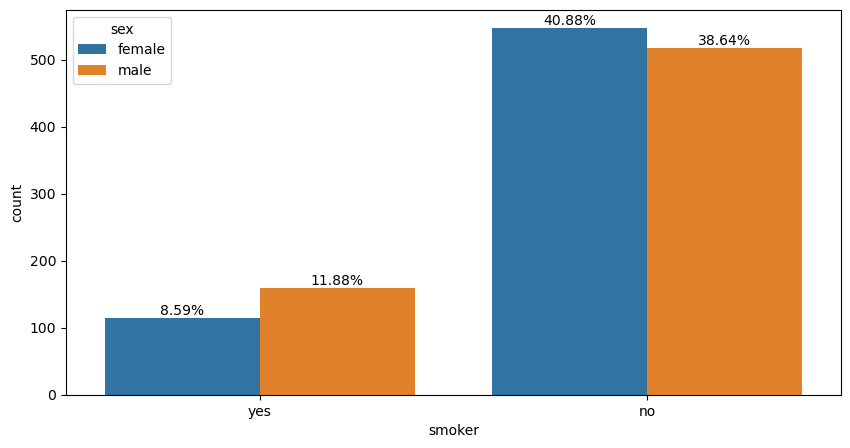

In [4]:
fig,ax=plt.subplots(figsize=(20,7))
ax=sb.countplot(data=Data, x='smoker', hue='sex')

for bar in ax.patches:
    percentage=f'{round(bar.get_height()/len(Data)*100,2)}%'
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
    fig.set_figheight(5)
    fig.set_figwidth(10)
plt.show()

Task 2.b: How does Obsity exist among smokers and non-smokers policyholders?

In [41]:
Data['Obesity']=Data['bmi'].apply(lambda x: 'yes' if x>25 else 'no') #feature engineering

In [47]:
Data.head()

,age,sex,bmi,children,smoker,region,charges,Obesity
0,19,0,27.900,0,1,3,16884.92400,yes
1,18,1,33.770,1,0,2,1725.55230,yes
2,28,1,33.000,3,0,2,4449.46200,yes
3,33,1,22.705,0,0,1,21984.47061,no
4,32,1,28.880,0,0,1,3866.85520,yes


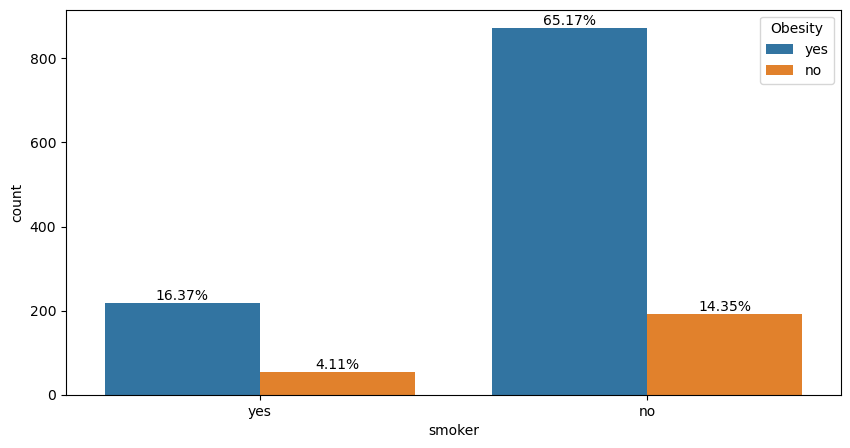

In [7]:
fig,ax=plt.subplots(figsize=(20,7))
ax=sb.countplot(data=Data, x='smoker', hue='Obesity')

for bar in ax.patches:
    percentage=f'{round(bar.get_height()/len(Data)*100,2)}%'
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
    fig.set_figheight(5)
    fig.set_figwidth(10)
plt.show()

Task 2.c: How do charges are distributed amongs regions?

<Axes: xlabel='region', ylabel='charges'>

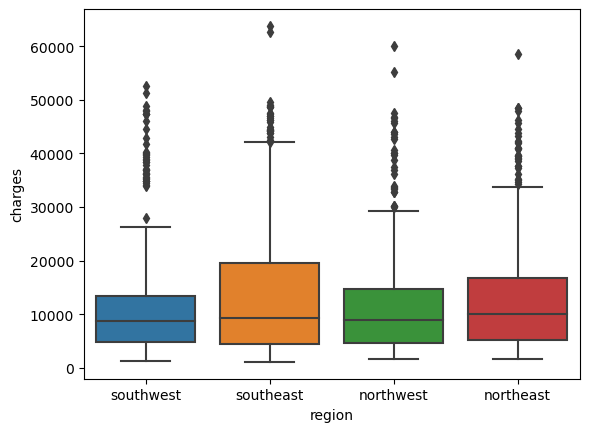

In [12]:
sb.boxplot(x='region',y='charges',data=Data)

Task 2.d: How do charges are distributed amongs genders?

<Axes: xlabel='sex', ylabel='charges'>

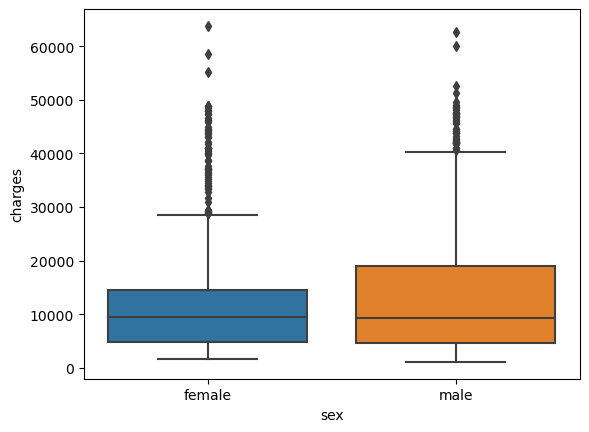

In [13]:
sb.boxplot(x='sex',y='charges',data=Data)

# Task 3.1: Apply the learned dimension reduction lgorithms.

# PCA

In [42]:
Data.shape

(1338, 8)

In [55]:
Data=Data.drop(columns=['Obesity'])

In [56]:
Data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [117]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)  # Creating the object of PCA # n_components=7 because here we have 7 maximum features.
pd_data1=pca.fit(Data)

In [118]:
pd_data1.explained_variance_ratio_    # here we are getting 7 variance for each of the 7 features from the data.

array([9.99998510e-01, 1.22666199e-06, 2.42985014e-07, 9.87379186e-09,
       8.08508699e-09, 1.69554889e-09, 3.13940210e-10])

In [119]:
sum(pd_data1.explained_variance_ratio_)

1.0000000000000002

In [120]:
var_ratio={}
for i in range (2,8):
    pca=PCA(n_components=i) # Creating the object of PCA # n_components=8 because here we have 7 maximum features.
    pd_data1=pca.fit(sc_data)
    var_ratio[i]=sum(pd_data1.explained_variance_ratio_)
var_ratio   # High Variance is good below in dictionary we can see the Key= no. of components and Value= Variance Ratio.
            # Variance between 80%-85% is good

{2: 0.43808151514013605,
 3: 0.5876900797585243,
 4: 0.7305458012916991,
 5: 0.8667273620786274,
 6: 0.9809364358544297,
 7: 0.9999999999999999}

<Axes: >

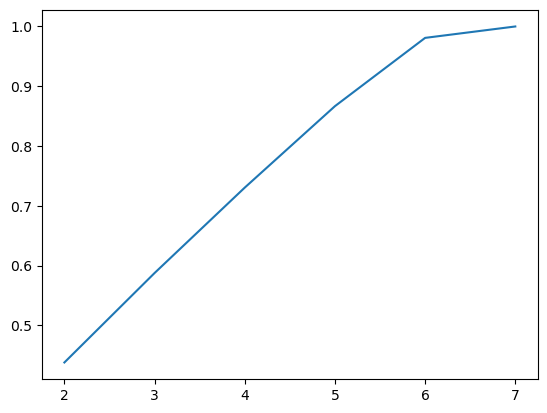

In [121]:
pd.Series(var_ratio).plot(kind='line')  # here we are chaking the turning point like elbow method. (between 5-6)
                                        # Here we have converted in Series as we cant plot using Dictionary. 
                                        # we have all values in Dictionary thats why we converted in Series.

In [122]:
pca=PCA(n_components=5)    # n_components=5 because we have variance= 5:0.866 i.e 86% for 5 features thats why we are using 5
pd_data1=pca.fit(sc_data)
pd_data2=pca.fit_transform(sc_data)

In [123]:
df1=pd.DataFrame(pd_data2)
df1

,0,1,2,3,4
0,0.865510,0.812083,-1.344438,-1.557905,1.941264
1,-1.138648,-0.244891,-1.751069,0.395993,-0.022993
2,-0.705309,-0.641423,-0.880221,1.812120,0.391507
3,-0.167003,1.283676,-0.565617,-0.096632,-0.902108
4,-1.025671,0.561317,-0.841474,-0.122670,-1.068473
...,...,...,...,...,...
1333,-0.062757,-0.437590,0.539992,1.931093,-0.608626
1334,-1.505781,1.102570,-0.022210,-0.997317,0.118007
1335,-1.317180,-0.461392,-0.856748,-1.325000,0.797583
1336,-1.580503,0.105705,-0.834984,-1.255946,1.373953


In [66]:
sum(pd_data1.explained_variance_ratio_)   # Here we an see the total variance of 5 features. which are there in pd_data1.

0.8284621264682358

In [67]:
pd_data1.explained_variance_  # Here we are chaking the variance of 6 features which are there in pd_data1.

array([1.9870661 , 1.61560115, 1.05335223, 1.00784091, 0.96879375])

# Task 4: Apply the Agglomerative Clustering algorithm

# Agglomerative Clustering without Feature Reduction

In [100]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,8):
    hc=AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    y_hc=hc.fit_predict(sc_data)
    print(k,silhouette_score(sc_data,y_hc))

2 0.30391609370971484
3 0.1494722997165639
4 0.15021058006020813
5 0.1491814519808464
6 0.14584997799754673
7 0.15670207840269829


Here we are getting the best K value as 2 = 0.30

In [101]:
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward') # here we train the model with best K value i.e 2
y_hc=hc.fit_predict(Data)
Data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


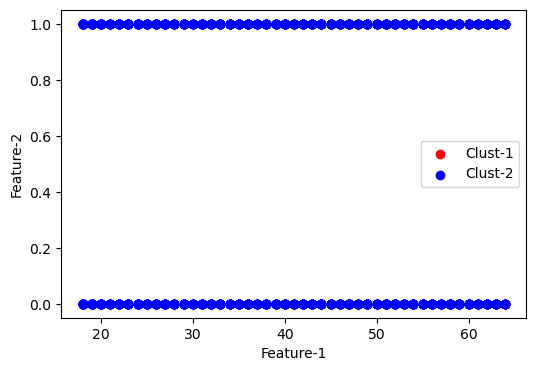

In [103]:
Data=Data.to_numpy()
plt.figure(figsize=(6,4))
plt.scatter(Data[y_hc==0,0],Data[y_hc==0,1],color='red',label='Clust-1')
plt.scatter(Data[y_hc==1,0],Data[y_hc==1,1],color='blue',label='Clust-2')
plt.legend()
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [108]:
hc.fit(Data)
Data['hc.labels_']=hc.labels_
metrics.silhouette_score(Data,Data['hc.labels_'])

0.6832421171291994

# Agglomerative Clustering with Feature Reduction

In [109]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,8):
    hc=AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    y_hc=hc.fit_predict(df1)
    print(k,silhouette_score(df1,y_hc))

2 0.3068031245523037
3 0.33829232705940765
4 0.21007489909285787
5 0.20269280342888196
6 0.20391828101354192
7 0.21367758103267523


Here we are getting the best K value as 3=0.306

In [111]:
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward') # here we train the model with best K value i.e 3
y_hc=hc.fit_predict(df1)
df1

,0,1,2,3,4
0,0.717851,0.705887,-1.479140,-1.050773,2.143216
1,-0.639484,-1.189957,-1.681871,0.588502,-0.067525
2,-0.278593,-0.984824,-0.571964,1.951747,-0.063300
3,-1.307772,1.929228,-0.728589,-0.177983,-0.621671
4,-0.778641,-0.541498,-1.063863,-0.335856,-1.018505
...,...,...,...,...,...
1333,0.176397,-0.428613,0.732433,1.667687,-1.087210
1334,-1.197796,-0.682561,-0.545409,-1.452002,-0.389644
1335,-0.678367,-1.539638,-0.931568,-1.067989,0.937410
1336,-1.288671,-0.808399,-0.853289,-0.802273,1.686623


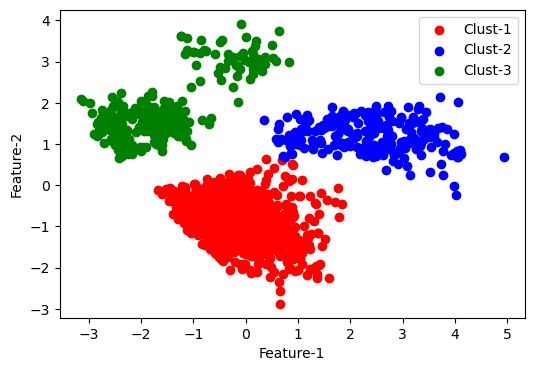

In [112]:
df1=df1.to_numpy()
plt.figure(figsize=(6,4))
plt.scatter(df1[y_hc==0,0],df1[y_hc==0,1],color='red',label='Clust-1')
plt.scatter(df1[y_hc==1,0],df1[y_hc==1,1],color='blue',label='Clust-2')
plt.scatter(df1[y_hc==2,0],df1[y_hc==2,1],color='green',label='Clust-3')
plt.legend()
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [124]:
hc.fit(df1)
df1['hc.labels_']=hc.labels_
metrics.silhouette_score(df1,df1['hc.labels_'])

0.30887197171110975

Interpretation: Here we can see in the Agglomeritive silhouette_score without feature reduction is 0.68 and with feature reduction is 0.30

# Apply the KMeans algorithm

# KMean Clustering without Feature Reduction

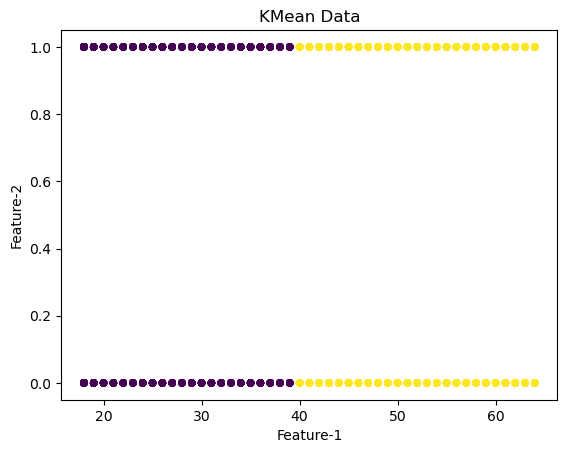

In [132]:
from sklearn.cluster import KMeans
km_model=KMeans(n_clusters=2)
km_model.fit(Data[['age','sex']])
Data['km_model.labels_']=km_model.labels_
plt.scatter(Data['age'],Data['sex'],s=20,c=Data['km_model.labels_'])
plt.title('KMean Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [133]:
metrics.silhouette_score(Data,Data['km_model.labels_'])

0.16959577127416509

# KMean Clustering with Feature Reduction

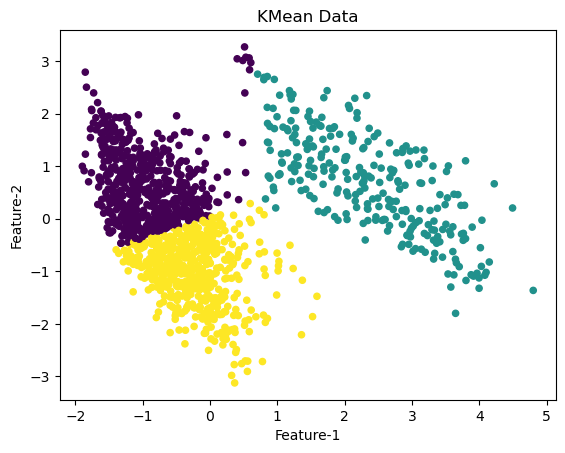

In [134]:
from sklearn.cluster import KMeans
km_model2=KMeans(n_clusters=3)
km_model2.fit(df1[['age','sex']])
df1['km_model2.labels_']=km_model2.labels_
plt.scatter(df1[0],df1[1],s=20,c=df1['km_model2.labels_'])
plt.title('KMean Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [135]:
metrics.silhouette_score(df1,df1['km_model2.labels_'])

0.29284273544395867

Interpretation: Here we can see in the KMean silhouette_score without feature reduction is 0.16 and with feature reduction is 0.29

# Apply the DBSCAN algorithm

# DBSCAN Clusturing without Feature Reduction

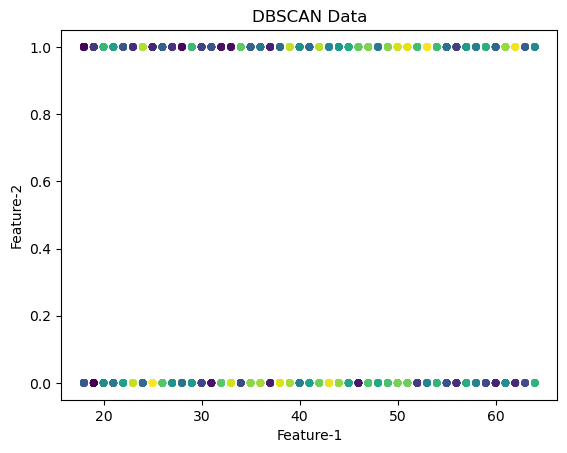

In [136]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()  # Creating the Object (DBSCAN is hyper-parameter here we are using the default setting of DBSCAN)
dbscan.fit(Data[['age','sex']])
Data['dbscan.labels_']=dbscan.labels_
plt.scatter(Data['age'], Data['sex'],s=20,c=Data['dbscan.labels_'])
plt.title('DBSCAN Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [137]:
metrics.silhouette_score(Data,Data['dbscan.labels_'])

-0.586013027303879

# DBSCAN Clusturing with Feature Reduction

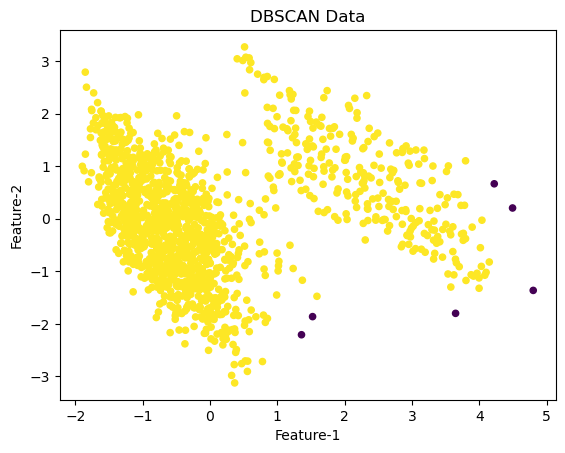

In [138]:
dbscan2=DBSCAN()   # DBSCAN is hyper-parameter here we are using the default setting of DBSCAN
dbscan2.fit(df1[[0,1]])
df1['dbscan2.labels_']=dbscan2.labels_
plt.scatter(df1[0],df1[1],s=20,c=df1['dbscan2.labels_'])
plt.title('DBSCAN Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [139]:
metrics.silhouette_score(df1,df1['dbscan2.labels_'])

0.2406873783752624

Interpretation: Here we can see in the DBSCAN silhouette_score without feature reduction is -0.58 and with feature reduction is 0.24

# Conclusion: We are getting best score in Agglomeritive Algorithm.